# Covariance Matrix Calculations

## The following cell was used to download data from my local drive. Do not run it.

In [ ]:
#create data
df = pd.DataFrame()
for filename in glob.glob("/Volumes/Extreme SSD/ODAS_data/Ardel1/*.csv"):
    temp = pd.read_csv(filename)
    df = df.append(temp)
data = df.values
data = data[:, 1:]

## The following cell imports the .db file when run

In [1]:
!ls ../../Data/K_cluster_analysis.db

../../Data/K_cluster_analysis.db


In [2]:
%%time
#run this to import
try:
    import dill
except:
    %pip install dill
    import dill
dill.load_session('../../Data/K_cluster_analysis.db')

CPU times: user 1.04 s, sys: 871 ms, total: 1.92 s
Wall time: 2.33 s


## The following cell saves the current notebook's state into the .db file.

In [ ]:
#run this to save
try:
    import dill
except:
    %pip install dill
    import dill
dill.dump_session('K_cluster_analysis.db')

## Covariance matrix

Below are the cells run in order to calculate Eigen Values and Vectors from the data. After running the import cell, you will have the following values:<br><br>
data: all data points with 13 dimensions (the first column being '1' and the following 12 being the xyz's of the point)<br>
cov: the calculated covariance matrix<br>
eigen_values: eigen values of the covariance matrix<br>
eigen_vectors: eigen vectors of the covariance matrix

In [3]:
import pandas as pd
import numpy as np
from sklearn import decomposition
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.cluster import KMeans
import glob

In [4]:
from numpy import linalg as LA

def outerProduct(X):
    """Computer outer product and indicate which locations in matrix are undefined"""
    O=np.outer(X,X)
    N=1-np.isnan(O)
    return (O,N)

def sumWithNan(M1,M2):
    """Add two pairs of (matrix,count)"""
    (X1,N1)=M1
    (X2,N2)=M2
    N=N1+N2
    X=np.nansum(np.dstack((X1,X2)),axis=2)
    return (X,N)

In [126]:
%%time
block_size=100
# calculate covariance matrix

all_outters = np.zeros((13, 13))
all_non_nan = np.zeros((13, 13))
for j in range(0,block_size*10,block_size):
    outters = np.zeros((13, 13))
    non_nan = np.zeros((13, 13))
    for i in range(j,j+block_size): #len(data)):
        outters, non_nan = sumWithNan((outters, non_nan), outerProduct(data[i]))
    all_outters +=outters
    all_non_nan +=non_nan
    
    zeros=non_nan==0
    non_nan[zeros]=1
    outters[zeros]=1
    
    _cov = outters/non_nan
    _cov = _cov[1:, 1:] - np.outer(_cov[0, 1:], _cov[0, 1:])

    #eigen values
    eigen_values, eigen_vectors = LA.eig(_cov)
    
    print('%d: '%j + ', '.join(['%3.1g'%v for v in list(eigen_values)]))

0:   4,  -4, 1e-05, 1e-08, 2e-16, 5e-22, -3e-22, -4e-27, -4e-27, -6e-31, -4e-74, -5e-58
100:  -4,   4, 1e-05, -9e-18, -2e-21, -5e-23, -1e-25, 7e-37, -5e-39, -8e-71, 8e-87,   0
200:   4,  -4, 4e-06, 1e-16, 6e-23, -5e-24, -7e-26, 8e-38, 4e-40,   0, 1e-72,   0
300:   4,  -4, 2e-05, 1e-08, -9e-17, -4e-22, -3e-23, -4e-26, -5e-27, -6e-38, 5e-60,   0
400:   4,  -4, 1e-05, -1e-16, 4e-23, 5e-22, 3e-26, 7e-40, 7e-40, 7e-71,   0,   0
500:   4,  -4, 6e-06, -8e-17, 2e-22, 1e-22, 6e-27, 5e-38, 3e-39,   0, -3e-71,   0
600:   4,  -4, 3e-05, 1e-08, 2e-22, 1e-16, 1e-24, 1e-24, 2e-31, 5e-26,   0, 1e-57
700:   4,  -4, 2e-05, 8e-22, -1e-16, -2e-26, -1e-23, -6e-41, -3e-39,   0, 8e-73,   0
800:  -4,   4, 1e-05, 2e-16, 2e-22, 2e-22, 3e-25, -1e-35, -1e-38, -3e-86, -5e-70,   0
900:   4,  -4, 2e-05, 1e-08, -1e-16, 1e-22, 2e-21, 3e-25, -9e-26, -3e-30, -5e-58,   0
CPU times: user 62.4 ms, sys: 12.9 ms, total: 75.3 ms
Wall time: 67.2 ms


/Users/yoavfreund/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: ComplexWarning: Casting complex values to real discards the imaginary part


In [128]:
eigen_vectors[0,:]

array([ 2.35701861e-01,  2.35702660e-01, -1.28574962e-06,  2.58809975e-09,
       -1.17850240e-01,  3.14333173e-02,  8.70726760e-01, -2.71538175e-05,
        2.36256162e-05, -2.01494281e-06, -2.92701723e-17,  5.56797299e-34])

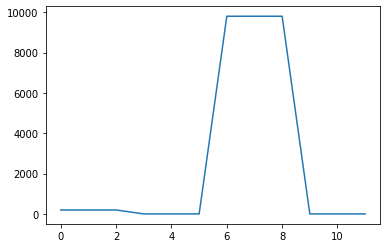

In [89]:
plot(non_nan[0,1:])

In [90]:
eigen_values

array([-9.99838795e-01,  9.99840525e-01,  3.44039948e-06,  1.08814927e-05,
        3.93786423e-04,  4.90619551e-05,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

In [71]:
outters.dtype

dtype('float64')

In [72]:
data[4]

array([ 1.   ,    nan,    nan,    nan,    nan,    nan,    nan, -0.012,
        0.   ,  1.   ,    nan,    nan,    nan])

In [10]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/yoavfreund/opt/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['cov']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


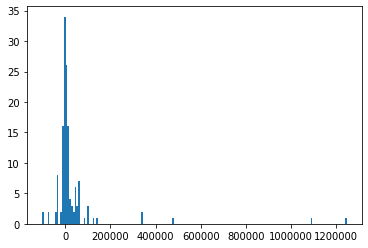

In [83]:
hist(outters[1:,1:].flatten(),13*13);

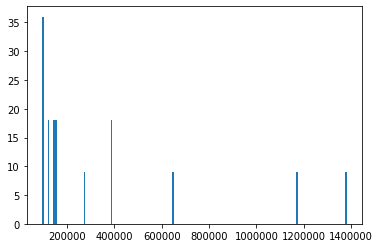

In [84]:
hist(non_nan[1:,1:].flatten(),13*13);

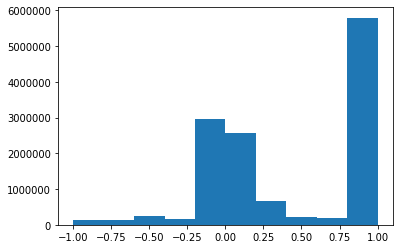

In [52]:
hist(data.flatten());